In [7]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [3]:
xdata = np.array([2,4,6,8,10])
ydata = np.array([42.0, 48.4, 51.3, 56.3, 58.6])

result = linregress(xdata,ydata)
A = result.intercept
B = result.slope

print(A,B)

38.99000000000001 2.055


C:\Users\john0\AppData\Local\Temp\ipykernel_1548\150468354.py:9: RuntimeWarning: invalid value encountered in sqrt
  Sigma_T = np.sqrt(1/len(xdata)-2)*np.sum(np.power((ydata - (A+B*xdata)),2))
C:\Users\john0\anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\john0\anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


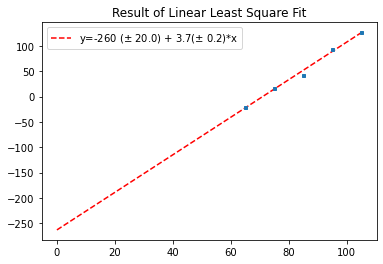

In [5]:
xdata = np.array([65, 75, 85, 95, 105])
ydata = np.array([-20,17,  42, 94, 127])

result = linregress(xdata, ydata)
A = result.intercept
B = result.slope
Sigma_A = result.intercept_stderr
Sigma_B = result.stderr
Sigma_T = np.sqrt(1/len(xdata)-2)*np.sum(np.power((ydata - (A+B*xdata)),2))

plt.title('Result of Linear Least Square Fit')
plt.errorbar(xdata, ydata, yerr = Sigma_T, marker='s', markersize=3, capsize=3, ls='none')
xfit = np.linspace(0, xdata.max(), 100)
yfit = A+B*xfit
plt.plot(xfit, yfit,'r--', label = f'y={np.round(A,-1):.0f} ($\pm$ {np.round(Sigma_A, -1)}) + {B:.1f}($\pm$ {Sigma_B:.1f})*x')
plt.legend()

In [8]:
r1 = result.rvalue
print(f'scipy.stats.inregress를 이용한 상관계수 r={r1:.3f}')

r2 = stats.pearsonr(xdata, ydata)[0]
print(f'scipy.stats.pearsonr를 이용한 상관계수 r = {r2:.3f}')

r3 = np.corrcoef(xdata, ydata)[0,1]
print(f'numpy corrcoef를 이용한 상관계수 r = {r3:.3f}')

df1 = pd.DataFrame(xdata)
df2 = pd.DataFrame(ydata)
r4 = df2.corrwith(df1)[0]
print(f'Pandas를 이용한 상관계수 r = {r4:.3f}')

scipy.stats.inregress를 이용한 상관계수 r=0.995
scipy.stats.pearsonr를 이용한 상관계수 r = 0.995
numpy corrcoef를 이용한 상관계수 r = 0.995
Pandas를 이용한 상관계수 r = 0.995
